# Explore here
Paso 1: Carga del conjunto de datos


In [66]:
#===============================================================================
#                Cargar Archivos
#===============================================================================

# Your code here
import pandas as pd

Ruta_Arch = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ",")
total_data.head(200)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
195,5,158,84,41,210,39.4,0.395,29,1
196,1,105,58,0,0,24.3,0.187,21,0
197,3,107,62,13,48,22.9,0.678,23,1
198,4,109,64,44,99,34.8,0.905,26,1


## Paso 2: Realiza un EDA completo

In [67]:
#===============================================================================
#                Estudio Unidimensional
#===============================================================================


# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

#descripcion
total_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
total_data.shape

(768, 9)

In [69]:
Col_Con_Ceros = total_data.describe().loc['min'] == 0
Total_Ceros = Col_Con_Ceros[Col_Con_Ceros].index.tolist()
print("Columnas con mínimo igual a 0:", Total_Ceros)
print("Valores cero antes de la imputación:\n", (total_data[Total_Ceros] == 0).sum())

Columnas con mínimo igual a 0: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']
Valores cero antes de la imputación:
 Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [70]:
# Calcular el porcentaje de ceros en cada columna
Total_Ceros = (total_data[Total_Ceros] == 0).sum() / len(total_data) * 100
print("Porcentaje de valores cero por columna:\n", Total_Ceros)

Porcentaje de valores cero por columna:
 Pregnancies      14.453125
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
Outcome          65.104167
dtype: float64


In [71]:
total_data.shape

(768, 9)

In [72]:

#===============================================================================
#                Missing Data Ceros, N/A
#===============================================================================
# Count NaN
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Como primera Conclusion obtenida del describese observa que Hay datos de min = 0 En Campos que no tienen Sentido: 

Presion arterial (BloodPressure) no puede ser Cero

Indice de MAsa Corporea (BMI)

Glucosa e Insulina

Grosor de la piel (SkinThickness)

Lo siguiente que vemos es que no hay datos Null.

Voy a contar, cuantos de los Datos que tienen una de las 5 Anteriores en Cero, Tieen la Variable Objetivo en "1".  Esto para no perder esapacio muestral

In [73]:
total_data[(total_data['BMI'] == 0) & (total_data['Outcome'] == 1) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
706,10,115,0,0,0,0.0,0.261,30,1


In [74]:
total_data[(total_data['BloodPressure'] == 0) & (total_data['Outcome'] == 1) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
15,7,100,0,0,0,30.0,0.484,32,1
78,0,131,0,0,0,43.2,0.270,26,1
193,11,135,0,0,0,52.3,0.578,40,1
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1
269,2,146,0,0,0,27.5,0.240,28,1
300,0,167,0,0,0,32.3,0.839,30,1
332,1,180,0,0,0,43.3,0.282,41,1
357,13,129,0,30,0,39.9,0.569,44,1
435,0,141,0,0,0,42.4,0.205,29,1


In [75]:
total_data[(total_data['Insulin'] == 0) & (total_data['Outcome'] == 1) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
15,7,100,0,0,0,30.0,0.484,32,1
...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [76]:
#total_data.drop(total_data[total_data['BMI'] == 0].index, inplace=True)
#total_data.drop(total_data[total_data['BloodPressure'] == 0].index, inplace=True)
#total_data.drop(total_data[total_data['Glucose'] == 0].index, inplace=True)
#total_data.drop(total_data[total_data['SkinThickness'] == 0].index, inplace=True)
total_data.drop(total_data[(total_data['Insulin'] == 0) & (total_data['Outcome'] == 0) ].index, inplace=True)

In [77]:
Col_Con_Ceros = total_data.describe().loc['min'] == 0
Total_Ceros = Col_Con_Ceros[Col_Con_Ceros].index.tolist()
print("Columnas con mínimo igual a 0:", Total_Ceros)
print("Valores cero antes de la imputación:\n", (total_data[Total_Ceros] == 0).sum())

Columnas con mínimo igual a 0: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']
Valores cero antes de la imputación:
 Pregnancies       76
Glucose            3
BloodPressure     16
SkinThickness     88
Insulin          138
BMI                3
Outcome          264
dtype: int64


In [78]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    int64  
 2   BloodPressure             532 non-null    int64  
 3   SkinThickness             532 non-null    int64  
 4   Insulin                   532 non-null    int64  
 5   BMI                       532 non-null    float64
 6   DiabetesPedigreeFunction  532 non-null    float64
 7   Age                       532 non-null    int64  
 8   Outcome                   532 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 41.6 KB


In [79]:
total_data.shape

(532, 9)

Los Datos se redujeros de 768 Registros a  392 Registros

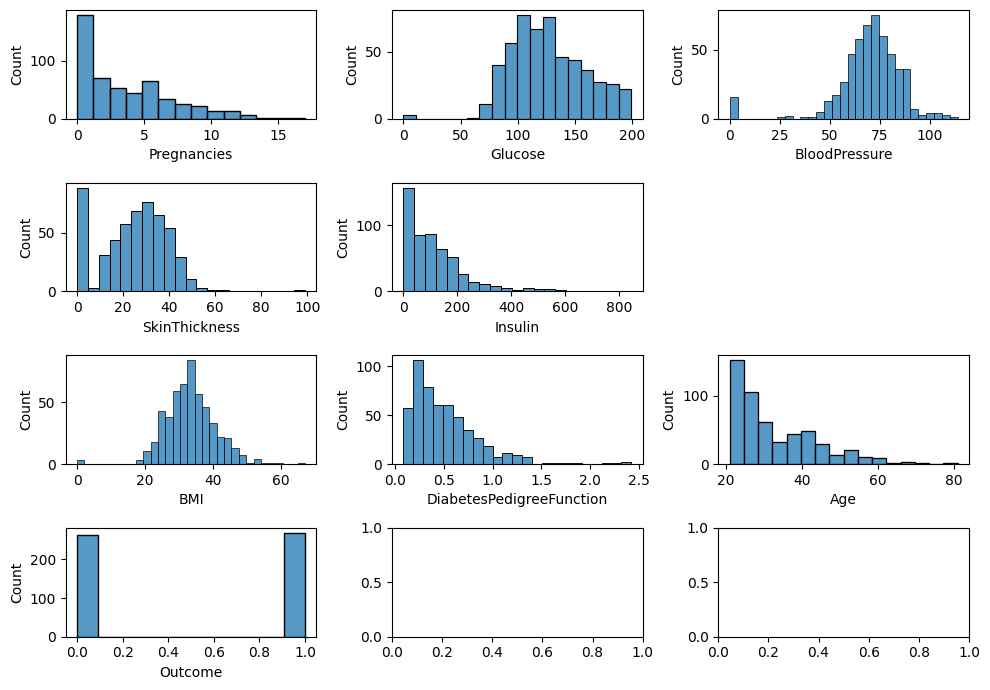

In [80]:
#===============================================================================
#        Esta Grafica me permite ver a donde se mueven los Datos
#                       Datos Categórico
#===============================================================================
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0,1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0,2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[1,0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[1,1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2,0], data = total_data, x = "BMI")
sns.histplot(ax = axis[2,1], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[2,2], data = total_data, x = "Age")
sns.histplot(ax = axis[3,0], data = total_data, x = "Outcome")


fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

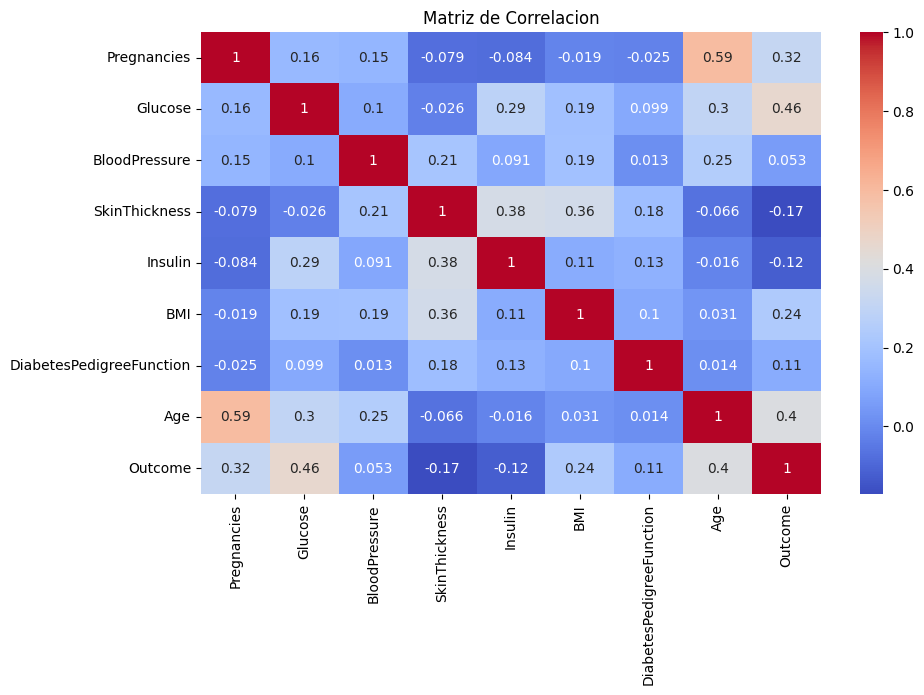

In [81]:
#******************************************************************************************************
#              Voy A Colocar El Analiziz MultiVariable A PArtir de Aqui
#******************************************************************************************************
#Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(total_data.corr(), annot=True, cmap='coolwarm')# sirve para ver la correlacion entre variables.
plt.title("Matriz de Correlacion")
plt.show()


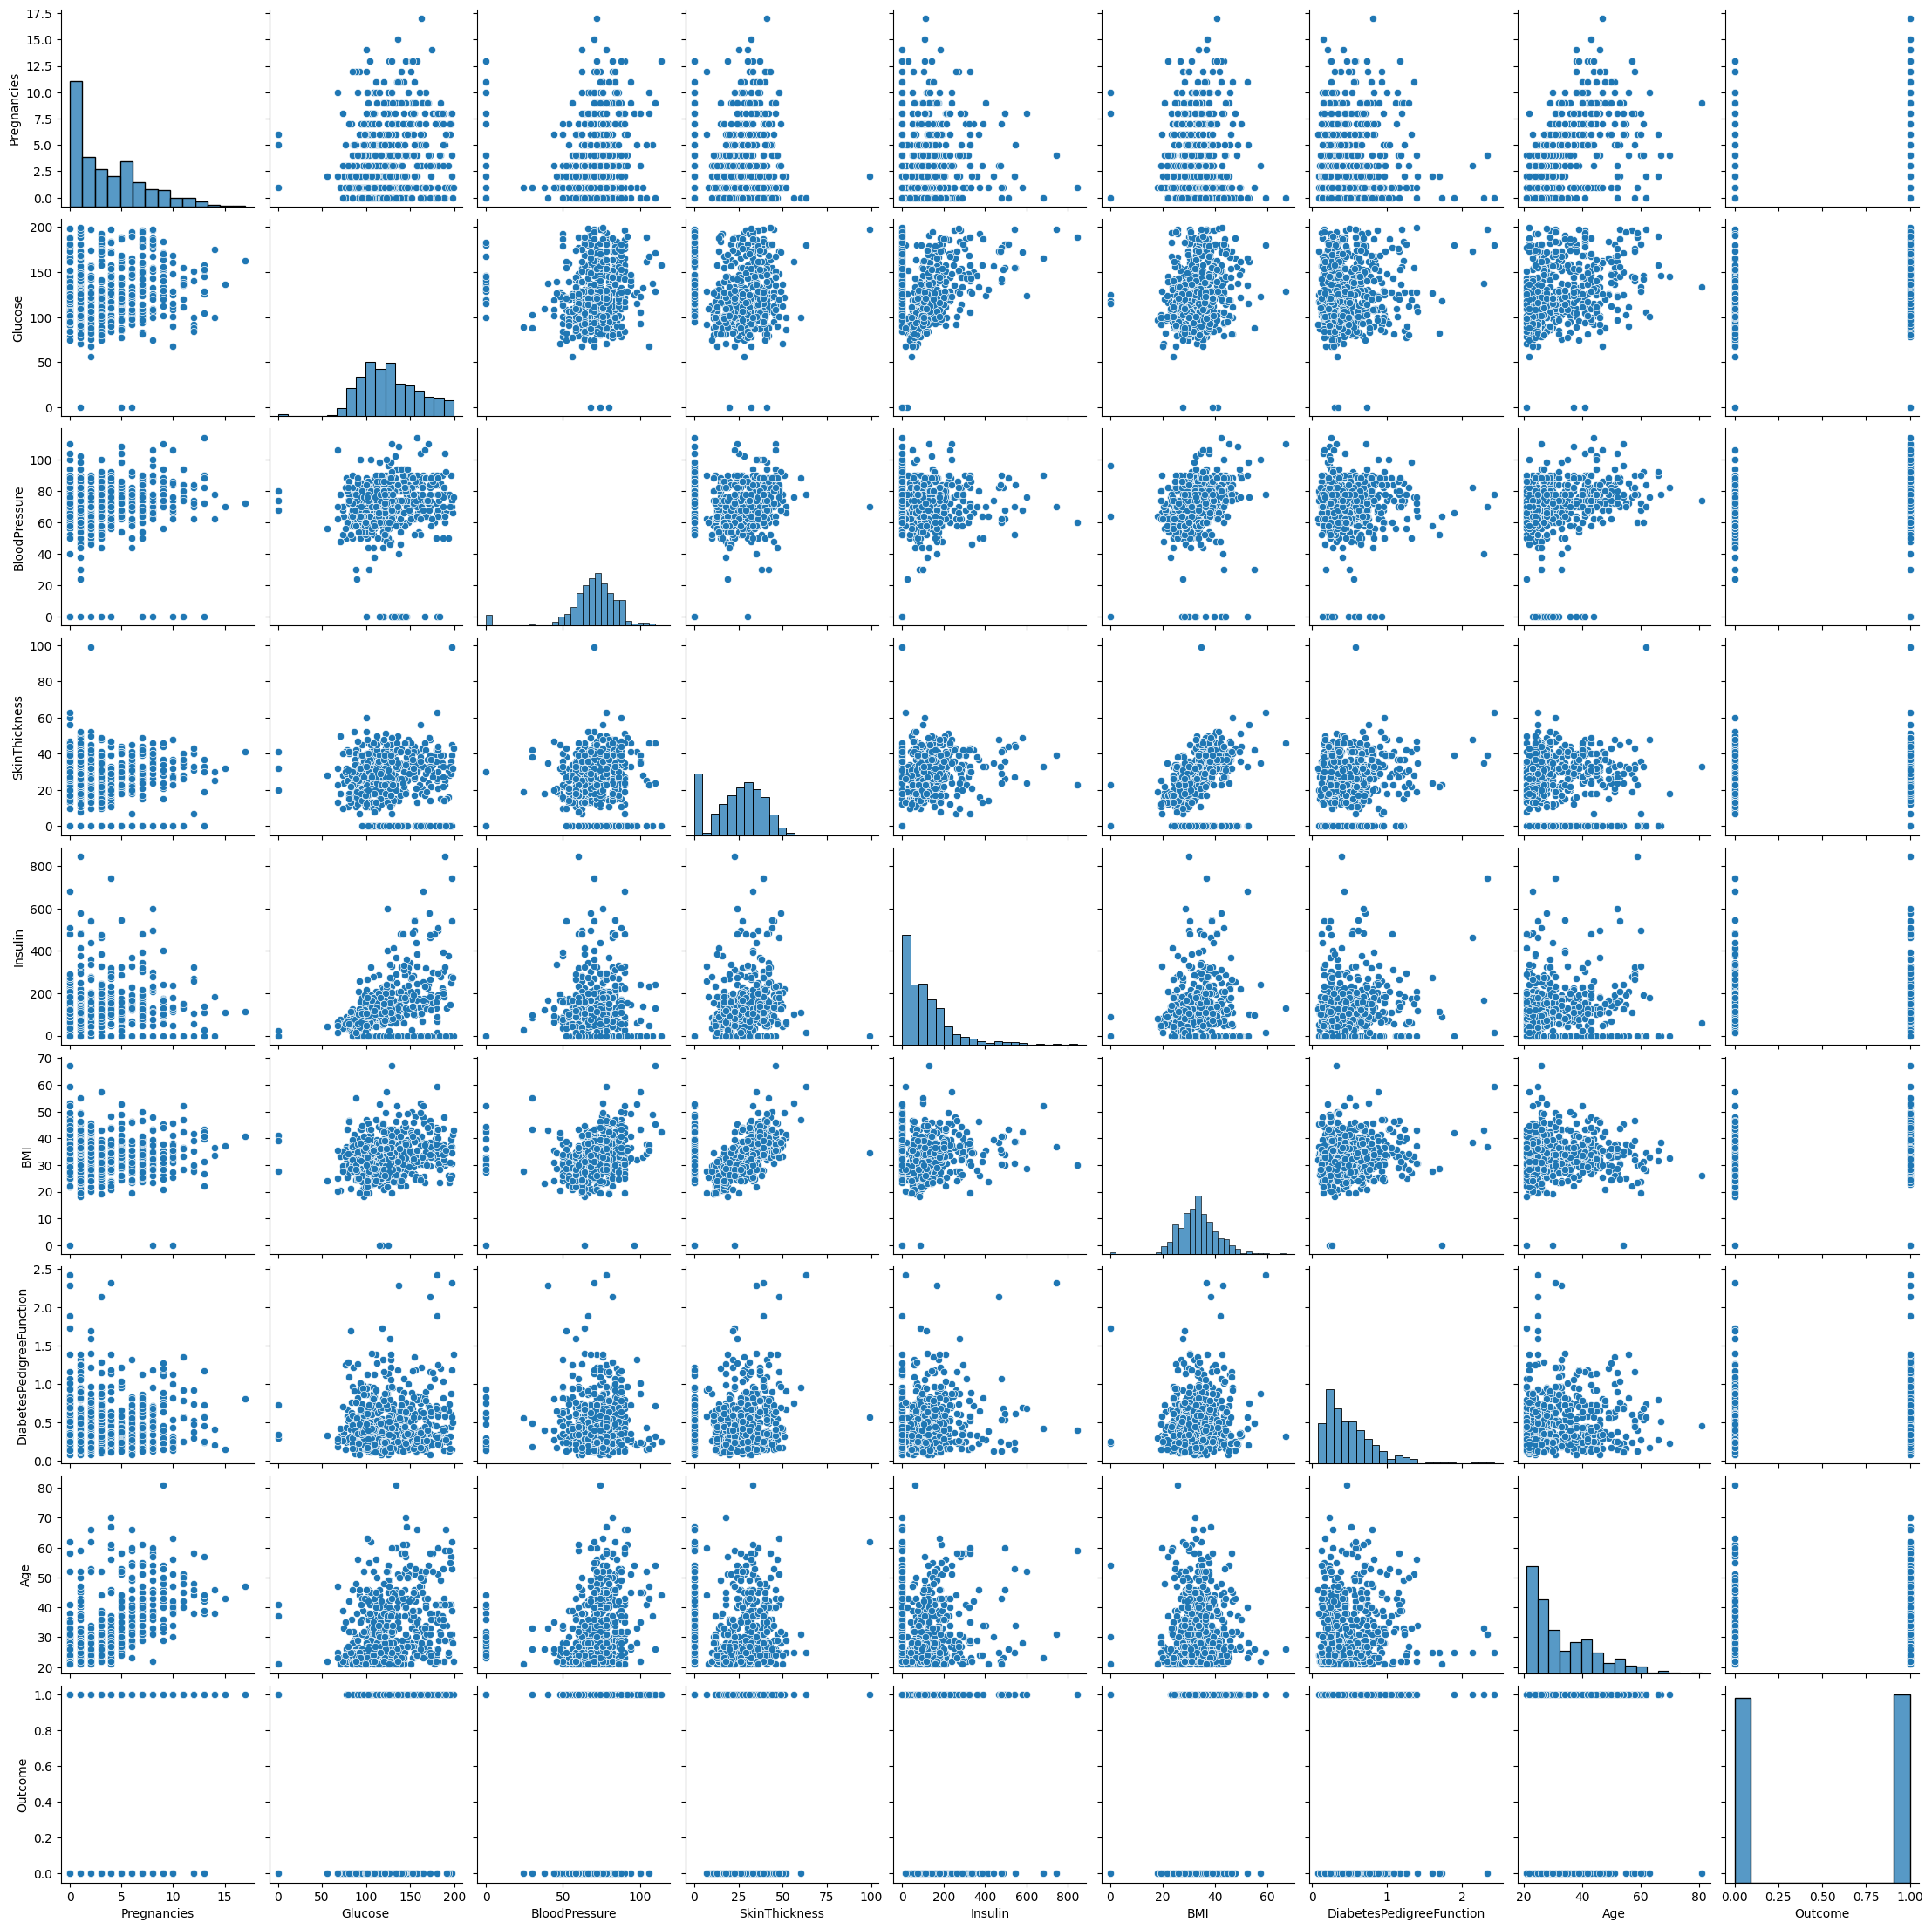

In [82]:
#===============================================================================
#                      Graficos Multiples
#===============================================================================
sns.pairplot(data = total_data)

In [83]:
total_data.shape

(532, 9)

## Paso 3: Construye un modelo de árbol de decisión

In [84]:
def Precision_Omega(y_test_o, y_pred_o):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    # comprobaciones del modelo.
    print(f"Accuracy: {accuracy_score(y_test_o, y_pred_o):.4f}") # Precisión general del modelo
    print(f"Precision: {precision_score(y_test_o, y_pred_o):.4f}") # Mide la proporción de positivos reales entre los predichos como positivos
    print(f"Recall: {recall_score(y_test_o, y_pred_o):.4f}") # Evalúa qué porcentaje de casos positivos fueron correctamente identificados
    print(f"F1 Score: {f1_score(y_test_o, y_pred_o):.4f}") # Combina precisión y recall para una evaluación equilibrada


def Matriz_Confusion(y_test_o, y_pred_o):

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()




In [87]:
#===============================================================================
#                      Mi Script Para El Split
#===============================================================================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crear el escalador
X = total_data.drop(columns=["Outcome"])
y = total_data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [88]:
model_01 = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf =1, random_state=32)
model_01.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,32
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.7477
Precision: 0.7627
Recall: 0.7759
F1 Score: 0.7692


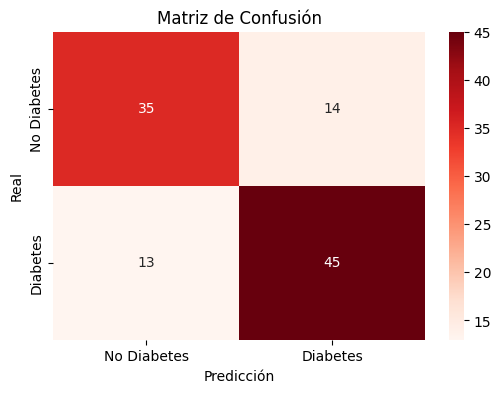

In [89]:
# Ver resultados de Precision
y_pred = model_01.predict(X_test)
Precision_Omega(y_test, y_pred)
Matriz_Confusion(y_test, y_pred)

In [90]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=32), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validated Score: 0.8258823529411764


In [92]:
model_Final = DecisionTreeClassifier(criterion="entropy", max_depth=5,min_samples_split=2,  random_state=32)
model_Final.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,32
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.7757
Precision: 0.7833
Recall: 0.8103
F1 Score: 0.7966


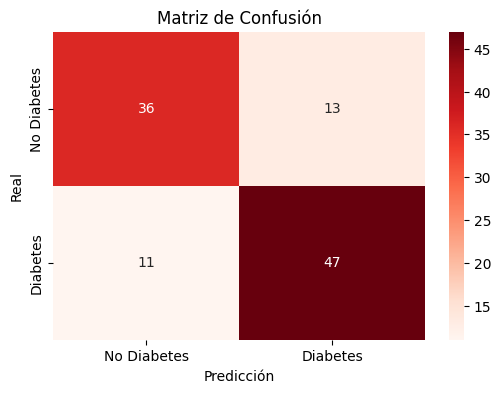

In [93]:
# Ver resultados de Precision
y_pred = model_Final.predict(X_test)
Precision_Omega(y_test, y_pred)
Matriz_Confusion(y_test, y_pred)

## Paso 5: Guarda el modelo